In [1]:
import os 
from os import listdir
import cv2
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
import ssl

In [24]:
def read_data(path,size=(224,224),pic_format='.jpg',testing=False):
    folder_dir =path
    samples = []
    if testing !=True:
        
        labels= []
        # read labels
        df_targets = pd.read_csv('train_labels.csv')
    for images in os.listdir(folder_dir):
        
        
        
        if (images.endswith(pic_format)):
            # read pics 
            img = cv2.imread(path+ images)
            
            reseized_img = cv2.resize(img,size)
        
            samples.append(reseized_img)
            if testing !=True:
                if df_targets[df_targets['filename']==images].iloc[0,1]=='without_mask':
                    labels.append(0)
                else: 
                    labels.append(1)
    
    if testing !=True:
        # dataset should be shuffled
        samples,labels = shuffle(np.array(samples),np.array(labels),random_state=42)
        return samples, labels
    else:
        return samples
        


In [3]:
# prepare your data
# give path of your dataset (pics),size of pics to be resized, pics format
samples,labels=read_data('./train/',)

In [4]:

def Visualizing(size):
    # select some random indices
    pics=np.random.randint(low=0,high=len(samples),size=size)

    for i,index in enumerate(pics) :
        # b = columns
        # rows = 3
        b=int(size/3)
        ax=plt.subplot(3,b,i+1)
        
        plt.imshow(samples[index])
        if labels[index] == 0:
            
            plt.title('without_mask')
        else:
            plt.title('with_mask')
        plt.axis("off")


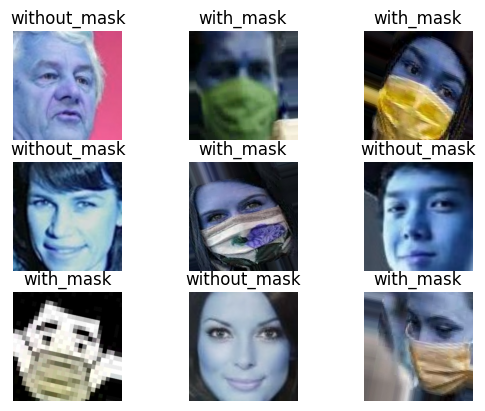

In [5]:
# how many pics you want to see
Visualizing(9)

In [6]:
# normalizing the data
# samples=samples/255

In [7]:
def split_data (samples=samples,labels=labels):
    # the proportion of test is equal to 20%
    X_train, X_test,Y_train,Y_test = train_test_split(samples,labels,test_size=0.20,random_state=42)
    # the proportion of validation is equal to 20%
    X_train, X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.20,random_state=42)
    return X_train, X_val,X_test,Y_train,Y_val,Y_test


In [8]:
# split data to 3 categories
X_train, X_val,X_test,Y_train,Y_val,Y_test=split_data()

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [10]:
def build_model():
    inputs = tf.keras.Input((samples.shape[1],samples.shape[2],3))
    # ssl._create_default_https_context = ssl._create_unverified_context
    model = EfficientNetB0(include_top=False,input_tensor=inputs,weights="imagenet")
    # Freeze the pretrained weights
    model.trainable = False
    # Rebuild top
    x= tf.keras.layers.GlobalAveragePooling2D()(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    # x=tf.keras.layers.Flatten()(x)
    x= tf.keras.layers.Dropout(rate=0.2)(x)
    outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
    model=tf.keras.Model(inputs,outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)
    model.compile(optimizer=optimizer,loss='BinaryCrossentropy',metrics=["accuracy"])
    return model

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/t

2023-03-10 20:50:30.281487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 20:50:30.281838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-03-10 20:50:33.187244: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-10 20:50:33.212082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:50:33.215121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:50:37.759699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - ETA: 0s - loss: 0.5972 - accuracy: 0.9623

2023-03-10 20:51:03.850233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:51:03.854012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:51:05.417981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 40s 919ms/step - loss: 0.5972 - accuracy: 0.9623 - val_loss: 0.5253 - val_accuracy: 0.9745
Epoch 2/10
37/37 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.9896

2023-03-10 20:51:35.970401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:51:35.973684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 29s 777ms/step - loss: 0.2863 - accuracy: 0.9896 - val_loss: 0.1298 - val_accuracy: 0.9906
Epoch 3/10
37/37 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.9831

2023-03-10 20:52:05.286850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:52:05.290164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 79s 2s/step - loss: 0.6716 - accuracy: 0.9831 - val_loss: 0.3806 - val_accuracy: 0.9861
Epoch 4/10
37/37 [==============================] - ETA: 0s - loss: 0.4172 - accuracy: 0.9903

2023-03-10 20:53:24.946886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:53:24.950665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 30s 804ms/step - loss: 0.4172 - accuracy: 0.9903 - val_loss: 0.2555 - val_accuracy: 0.9911
Epoch 5/10
37/37 [==============================] - ETA: 0s - loss: 0.2137 - accuracy: 0.9935

2023-03-10 20:53:53.882163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:53:53.885729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 29s 780ms/step - loss: 0.2137 - accuracy: 0.9935 - val_loss: 0.2549 - val_accuracy: 0.9928
Epoch 6/10
37/37 [==============================] - ETA: 0s - loss: 0.2948 - accuracy: 0.9926

2023-03-10 20:54:23.482236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:54:23.486259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 30s 817ms/step - loss: 0.2948 - accuracy: 0.9926 - val_loss: 0.2152 - val_accuracy: 0.9939
Epoch 7/10
37/37 [==============================] - ETA: 0s - loss: 0.3475 - accuracy: 0.9911

2023-03-10 20:54:54.357791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:54:54.361733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 31s 833ms/step - loss: 0.3475 - accuracy: 0.9911 - val_loss: 0.4136 - val_accuracy: 0.9922
Epoch 8/10
37/37 [==============================] - ETA: 0s - loss: 1.3617 - accuracy: 0.9806

2023-03-10 20:55:23.836001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:55:23.839573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 29s 792ms/step - loss: 1.3617 - accuracy: 0.9806 - val_loss: 0.3679 - val_accuracy: 0.9939


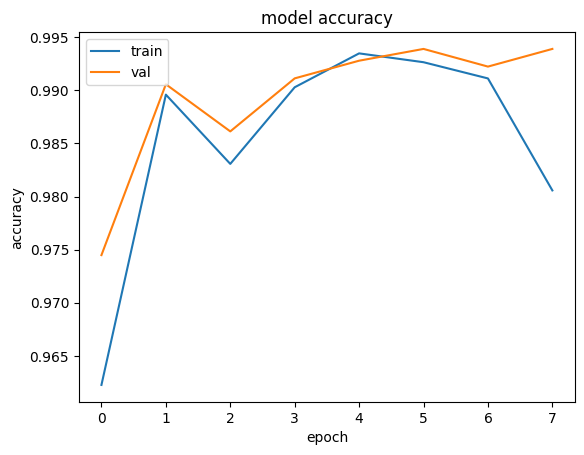

In [11]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = build_model()

hist = model.fit(X_train,Y_train,batch_size=200,epochs=10,validation_data=[X_val,Y_val],callbacks=[callback])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2023-03-10 20:55:31.495191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 20:55:31.498931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.24680066108703613
Test accuracy: 0.9973369240760803


## testing

In [29]:
data= read_data('./test/',testing=True)
data = np.array(data)

In [42]:
Y_predict=model.predict(data)
Y_predict=tf.math.round(Y_predict)

1/1 [==============================] - 0s 128ms/step


2023-03-10 21:39:24.623732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-10 21:39:24.626869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


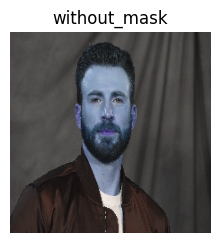

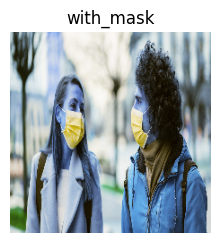

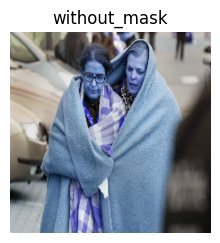

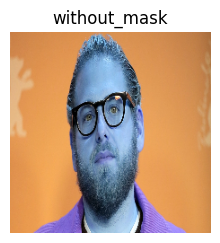

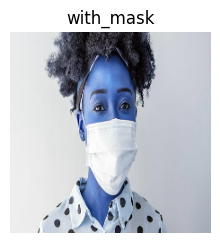

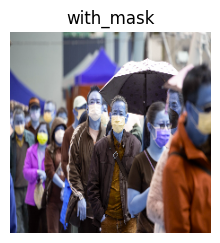

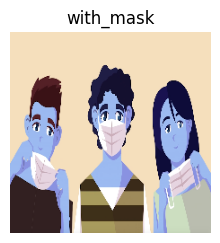

In [55]:
for i,pic in enumerate(data):
    fig = plt.figure()
    fig.set_figheight(12)
    fig.set_figwidth(12)
    ax=plt.subplot(4,2,i+1)
    plt.imshow(pic)
    
    
    if Y_predict[i] == 0.:
        
        plt.title('without_mask')
    else:
        plt.title('with_mask')
    plt.axis("off")
    

#### Conv

In [13]:
# Y_trainC = Y_train.reshape(-1,1)
# Y_valC= Y_val.reshape(-1,1)
# Y_testC=Y_test.reshape(-1,1)

In [14]:
# model = tf.keras.Sequential([tf.keras.Input(shape=[224,224,3]),
#                              tf.keras.layers.Conv2D(filters=32,kernel_size=4,strides=2,activation='relu'),
#                              tf.keras.layers.MaxPool2D(2),
#                              tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
#                              tf.keras.layers.Flatten(),
#                              tf.keras.layers.Dropout(0.5),
#                              tf.keras.layers.Dense(1,activation='sigmoid')
#                                             ])
# model.summary()

In [15]:
# model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(X_train,Y_trainC,batch_size=200,epochs=20,validation_data=[X_val,Y_valC],callbacks=[callback])

In [16]:
# score = model.evaluate(X_test,Y_testC,verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])